# Welcome to the PyTorch tutorial
### We will explore PyTorch from basics to advanced
##### This tutorials are based on https://github.com/yunjey/pytorch-tutorial but I customized it to make it more clear and useful for your term projects.

First let's import the required modules.

In [1]:
# main torch module
import torch 
# main torch vision module
import torchvision
# neural network components
import torch.nn as nn
# Last but not least mighty numpy 
import numpy as np
# vision image transformation functions
import torchvision.transforms as transforms


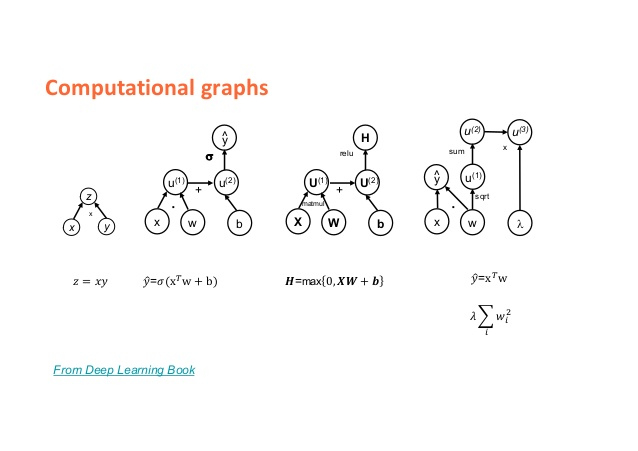

In [2]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
c = torch.tensor(1., requires_grad=False)
print(x)
print(c)

tensor(1., requires_grad=True)
tensor(1.)


In [3]:
# Build a computational graph.
y = w * x + b + c    # y = 2 * x + 3 + 1
print(y)

tensor(6., grad_fn=<AddBackward0>)


In [4]:
# Compute gradients.
y.backward()

In [5]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 
print(c.grad)    # c.grad = None 

tensor(2.)
tensor(1.)
tensor(1.)
None


##### So lets create a small neural network and make a gradient descent step

In [6]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4822, -0.1351,  0.2640],
        [-0.3325, -0.2438, -0.0889]], requires_grad=True)
b:  Parameter containing:
tensor([0.3416, 0.4732], requires_grad=True)


Now should asses our prediction with criterion and try to optimize our weights by using gradient descent  
You can find different loss functions from here: https://pytorch.org/docs/stable/nn.html#loss-functions  
Also there are lots of optimizers: https://pytorch.org/docs/stable/optim.html  

In [7]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

You can also write your own loss functions.   
It's just a normal Python function.  
It takes predictions(output) and target as argument and return a scalar value (loss). That's it.  

In [8]:
# Our custom loss function
def my_MSE(output, target):
    loss = torch.mean((output - target)**2)
    return loss

In [9]:
# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print(f"loss: {loss.item()}")

loss: 1.3068327903747559


In [10]:
# Backward pass.
loss.backward()

# Print out the gradients.
print(f"dL/dw: {linear.weight.grad}") 
print(f"dL/db: {linear.bias.grad}")


dL/dw: tensor([[-0.3092,  0.0130, -0.1300],
        [ 0.1735, -0.7652, -0.3700]])
dL/db: tensor([0.4532, 0.2329])


In [11]:
# 1-step gradient descent.
optimizer.step()

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print(f"loss after 1 step optimization: {loss.item()}")

loss after 1 step optimization: 1.295654058456421


Awesome our neural network gets better to predict absolutely nothing useful and random numbers.  

Tensors are highly interchangable with the numpy arrays. You can convert them each others easily.  
But, do not forget that Tensors keep gradient and other useful informations for neural networks. Numpy arrays do not.

In [12]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])
print(x)
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
print(y)
# Convert the torch tensor to a numpy array.
z = y.numpy()
print(z)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


Torchvision has different ready to use datasets like
CIFAR-10  
MNIST  
Fashion-MNIST   
Celeb-A   
You can see more in : https://pytorch.org/docs/stable/torchvision/datasets.html

In [13]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

Files already downloaded and verified


In [14]:
# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

torch.Size([3, 32, 32])
6


In [15]:
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

print(images.size())
print(labels)

torch.Size([64, 3, 32, 32])
tensor([1, 7, 3, 1, 2, 4, 9, 5, 8, 7, 1, 6, 8, 6, 3, 8, 7, 3, 1, 8, 9, 1, 4, 6,
        1, 2, 3, 6, 6, 2, 3, 1, 5, 6, 6, 7, 0, 9, 1, 8, 9, 9, 6, 5, 9, 6, 5, 4,
        2, 7, 9, 0, 2, 0, 6, 5, 3, 0, 4, 6, 3, 6, 6, 1])


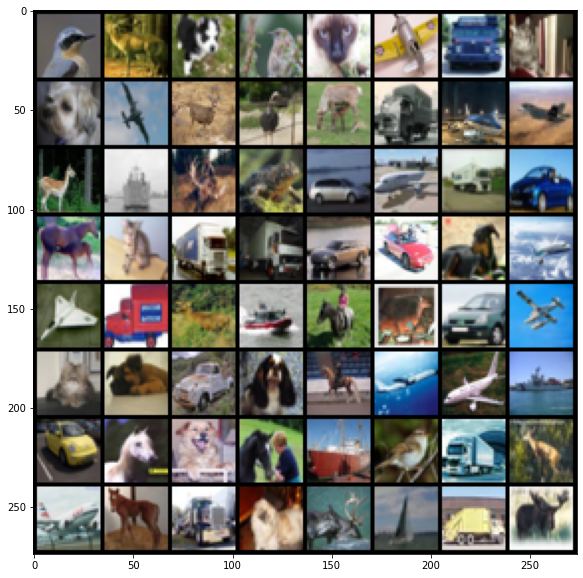

tensor([2, 4, 5, 2, 3, 0, 9, 3, 5, 0, 4, 2, 4, 9, 0, 0, 4, 8, 4, 6, 1, 0, 9, 1,
        7, 3, 9, 9, 1, 1, 5, 0, 0, 9, 4, 8, 7, 4, 1, 0, 3, 5, 9, 5, 7, 0, 0, 8,
        1, 7, 5, 7, 8, 2, 9, 4, 0, 7, 9, 5, 4, 8, 9, 4])


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Actually training code should be written here.
    
    # But we will be only showing images
    grid_imgs = torchvision.utils.make_grid(images)
    npimg = grid_imgs.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    print(labels)
    break

Okay we have cool ready to use datasets but If we have custom one like in your term projects

In [17]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        # for example
        #img_paths = [os.listdir("data")]
        #labels = pandas.read_csv("data.csv",sep=",")["labels"]
        pass
    
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        
        # index is image index not the batch index
        # You should only read the high dimensional data in this function and return it
        # for example
        # img = Image.open(img_paths[index])
        # label = labels[index]
        # return img, label
        pass
    def __len__(self):
        # You should change 1 to the total size of your dataset. Like below
        # return len(img_names)
        return 1

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

PyTorch also has some cool pretrained models.  
So you don't have to train them 1 week on ImageNet  
You can see more models in https://pytorch.org/docs/stable/torchvision/models.html

You can also use models from ModelZoo which some authors put their models on.
Also you can see some models which are trained on Tensorflow but provided for PyTorch

In [18]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)
# for model zoo you can use this
# torch.utils.model_zoo.load_url()

# Lets print our model to see what it is
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.tr = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

torch.Size([64, 1000])


If you pre/train your model then you should save model to use it later.  
You can also download models from different GitHub repos for custom models (Models which are trained outside of ImageNet are not in the PyTorch module you should get your models from author's GitHub repo and load it)

In [20]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>